# Esercitazione 4a settimana - Fisica Computazionale

## **Dinamica del punto materiale: piano inclinato, attrito, moto 2D in presenza di forze**

## **Esercizio 1. Piano inclinato**

Il varo è il momento in cui una nave [viene fatta entrare in acqua](https://i.pinimg.com/originals/78/a6/ce/78a6ce6caae8b01c667a6ebae110a3a5.gif). In alcuni casi, la nave viene costruita su una rampa inclinata, e lasciata scivolare in mare a lavori ultimati.

Considera:
- una nave di massa pari a $10^4$ tonnellate,
- su una rampa lunga $100\ m$,
- con coefficiente di attrito statico $\mu_s=0.1$ (l'attrito viene ridotto lubrificando la rampa).

1) quale deve essere l'angolo minimo della rampa in modo che la nave possa scivolare in acqua?

2) Per evitare la formazione di onde violente nel porto, si stima che la velocità di ingresso in acqua della nave non debba superare i 15 m/s. Qual è quindi l'angolo massimo della rampa perché questa condizione sia rispettata?

Calcola i risultati in assenza e in presenza di attrito dinamico ($\mu_d=0.7$).

## Soluzione numerica: **il metodo di bisezione**

Il metodo di bisezione ci permette di trovare, sotto alcune condizioni, lo ***zero*** di una funzione, cioè **il valore per cui una funzione si annulla**: è quindi molto utile quando le equazioni non sono risolvibili analiticamente.

## Esempio 1: la funzione $f(x)=x^2-4$

0 10
0 5.0
0 2.5
1.25 2.5
1.875 2.5
1.875 2.1875
1.875 2.03125
1.953125 2.03125
1.9921875 2.03125
1.9921875 2.01171875
1.9921875 2.001953125
1.9970703125 2.001953125
1.99951171875 2.001953125
1.99951171875 2.000732421875


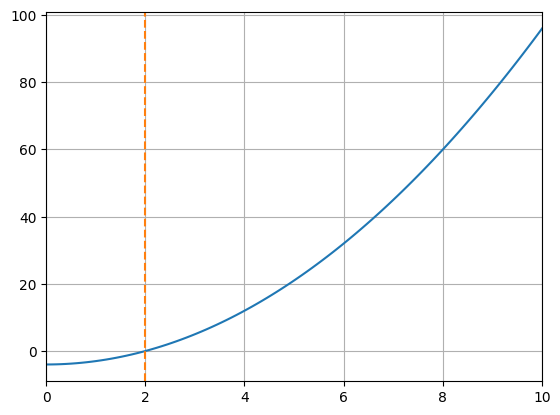

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def algoritmo_bisezione(f, x1, x2, risoluzione=0.001):    # f è una funzione!
    # alcune accortezze
    if x2 <= x1:
        print('x2 must be greater than x1')
        return
    elif f(x1)*f(x2) >= 0:
        print('f(x1) and f(x2) must have opposite signs')
        return
    else:
        xm = (x1+x2)/2
        while x2-x1 > risoluzione:
            print(x1,x2)            # scommenta per stampare le varie iterazioni
            xm = (x1+x2)/2
            if f(xm)*f(x1) >= 0:
                x1 = xm
            else:
                x2 = xm
        return xm

# esempio
def parabola(x):
    return x**2-4

# Scelgo x1 e x2 in modo che f(x1) e f(x2) abbiano segni opposti!
x1, x2 = 0, 10
x0 = algoritmo_bisezione(parabola, x1, x2)

# plot
xs = np.linspace(x1, x2, 100)
plt.plot(xs, parabola(xs))
plt.axvline(x=x0, ls='--', color='tab:orange')
plt.xlim(x1, x2)
plt.grid()


## Esempio 2: una funzione trascendente

-1 11
5.0 11
5.0 8.0
5.0 6.5
5.0 5.75
5.375 5.75
5.5625 5.75
5.65625 5.75
5.65625 5.703125
5.65625 5.6796875
5.66796875 5.6796875
5.673828125 5.6796875
5.6767578125 5.6796875
5.67822265625 5.6796875


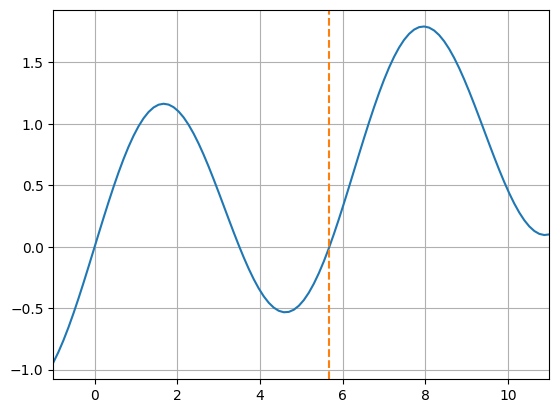

In [14]:
def una_funzione_trascendente(x):
    return np.sin(x) + x/10.

# Scelgo x1 e x2 in modo che f(x1) e f(x2) abbiano segni opposti!
x1, x2 = -1, 11
x0 = algoritmo_bisezione(una_funzione_trascendente, x1, x2)

# plot
xs = np.linspace(x1, x2, 100)
plt.plot(xs, una_funzione_trascendente(xs))
plt.axvline(x=x0, ls='--', color='tab:orange')
plt.xlim(x1, x2)
plt.grid()



#### Vediamo quindi che viene individuato soltanto **uno degli zeri**!
___

Ora vogliamo usare l'algoritmo per risolvere il punto 2. dell'esercizio del piano inclinato. Vogliamo cioè trovare l'angolo $\theta_{MAX}$, quello per cui la velocità di ingresso in acqua è esattamente uguale al valore critico di 10 m/s. Vogliamo cioè risolvere l'equazione (**nel caso senza attrito dinamico**):

$$\sqrt{g\cdot\sin x\cdot{2\cdot 100}}=15\quad(*)$$ 

Per usare l'algoritmo di bisezione dobbiamo però definire la funzione di cui vogliamo trovare lo *zero*! Definiamo allora $f(x)$ come:
$$f(x) \equiv \sqrt{9.81\cdot\sin x\cdot{2\cdot 100}}-15$$
in questo modo trovare il valore per cui $f(x)=0$ equivale a trovare una soluzione per l'equazione (*).

In [4]:
# il tuo codice

## **Esercizio 2. Moto rettilineo di un corpo con massa variabile**

Tratto da "Physics for Scientists and Engineers", 6th Edition, esercizio 11 cap. 5:

_Suppose a truck loaded with sand accelerates along a highway. If the driving force on the truck remains constant, what happens to the truck’s acceleration if its trailer leaks sand at a constant rate through a hole in its bottom?_

Sapendo che:
- il camion da vuoto pesa 10 tonnellate e sta trasportando 20 tonnellate di sabbia, 
- il camion perde $3\ m^3$ di sabbia ogni minuto,
- il camion accelera, da una velocità iniziale di $50\ km/h$ ad una finale di $140\ km/h$ (quando l'autista si accorge che c'è un problema) esercitando una forza di $5\ kN$, 
- la sabbia ha una densità di $\rho=1.5\ ton/m^3$.

Trova:
- la distanza percorsa tra istante iniziale e finale,
- il tempo trascorso,
- la sabbia persa lungo la strada.

**Risolvere matematicamente questo problema non è banale** perché l'accelerazione non è costante! Trova quindi una soluzione numerica **con il metodo di Eulero**.

### Ricorda che per trovare l'accelerazione puoi sempre usare la **seconda legge di Newton**: 
# $$\quad {\vec{F}=m\vec{a}}$$

In [5]:
# il tuo codice

## **Esercizio 3. Moto in 1D in presenza di gravità**

Nel libro "Dalla Terra alla Luna" Jules Verne immagina che l'uomo raggiunga la Luna a bordo di una [navicella che viene sparata da un cannone gigante](https://youtu.be/ZNAHcMMOHE8?si=w7G1E7VFP96HWx3a&t=374) puntato direttamente verso la Luna.

Qual è essere la velocità minima con cui un proiettile di questo genere dovrebbe uscire dal cannone per poter sfuggire al campo gravitazionale terrestre ed entrare in quello della Luna?

**Dati**
- massa Terra: $M_T=6.0 \times 10^{24}\ kg$
- raggio Terra: $R_T=6.4\times 10^3\ km$
- massa Luna: $M_L=7.3 \times 10^{22}\ kg$
- raggio Luna: $R_L=1.7\times 10^3\ km$
- distanza Terra-Luna: $3.8\times 10^8 m$
- costante gravitazione universale: $G=6.674\times 10^{-11}\ m^3 kg^{-1}s^{-2}$

**Trovare**
- la velocità di fuga $v_{fuga}$.


[]

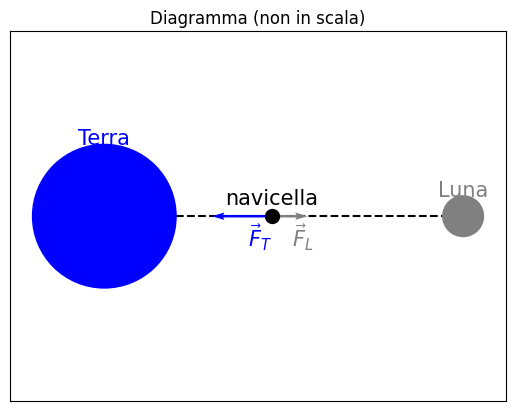

In [6]:
# DIAGRAMMA PROBLEMA
import matplotlib.pyplot as plt
from funzioni_fis_comp import *

dterraluna=30000
xnavicella=14000
terra = plt.Circle((0, 0), 6000, color='blue')  # 'fill=False' per solo contorno
luna = plt.Circle((dterraluna, 0), 1700, color='gray')  # 'fill=False' per solo contorno

fig, ax = plt.subplots()
plt.title('Diagramma (non in scala)')
ax.text(0, 6000, 'Terra', ha='center', fontsize=15, color='blue')
ax.text(dterraluna, 1700, 'Luna', ha='center', fontsize=15, color='gray')
ax.text(xnavicella, 1000, 'navicella', ha='center', fontsize=15)
ax.text(xnavicella, -2500, r'$\vec{F}_T\qquad$', ha='right', fontsize=15, color='blue')
ax.text(xnavicella, -2500, r'$\quad\vec{F}_L$', ha='left', fontsize=15, color='gray')
ax.add_patch(terra)
ax.add_patch(luna)
ax.axis('equal')
ax.plot(xnavicella, 0,'o', color='black', markersize=10)
disegna_vettore([-5000, 0], [xnavicella,0], color='blue')
disegna_vettore([3000, 0], [xnavicella,0], color='gray')
ax.plot([6000, dterraluna-1700], [0,0], '--', color='black', zorder=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

## Soluzione analitica

Anche qui possiamo calcolare la soluzione utilizzando considerazioni sulla conservazione dell'energia (facoltativo):

In [7]:
import numpy as np

# Dati (convertiti in unità SI)
M_T = 6.0E24             # massa Terra 
R_T = 6400 * 1000              # raggio Terra 

M_L = 7.3E22             # massa Luna 
R_L = 1700 * 1000              # raggio Luna 

m = 5000                     # massa proiettile

d = 3.8E8       # distanza Terra-Luna 
G = 6.7E-11            # costante gravitazione universale 

r = M_T/M_L
# il punto in cui la forza risultante sulla navicella si annulla
x = np.sqrt(r) * d / (1 + np.sqrt(r))
# le energie potenziali gravitazionali in x e sulla Terra
V_terra = -G * m * (M_T/R_T + M_L/(d-R_L))
V_x = -G * m *(M_T/x + M_L/(d-x))
# richiedendo che l'energia cinetica sia uguale a V(x) - V(terra) si ha:
v_fuga = np.sqrt(2/m * (V_x - V_terra))
print('La velocità di fuga è: %.0f m/s.' % v_fuga)

La velocità di fuga è: 11092 m/s.


## Soluzione numerica

In [8]:
# il tuo codice

## **Esercizio 4: Velocità minima per il giro della morte**
**Traccia:** Il vagone di un ottovolante di massa $m$ parte da fermo lungo un piano inclinato con angolo 
$\theta$ rispetto all'orizzontale, prima di entrare in un loop circolare (giro della morte) di raggio $R$. 

- Qual è la velocità minima $v_{min}$ che il vagone deve avere all'ingresso del loop affinché possa completare il giro senza staccarsi rimanendo sempre a contatto con i binari?

- Quale deve essere l'altezza iniziale del vagone sul piano inclinato affinché raggiunga questa velocità alla base del loop?

<details>
  <summary> Mostra la Soluzione</summary>
    
# **Velocità minima per completare il giro della morte**

## **1. Condizione per non staccarsi in cima al loop**
Affinché il vagone non cada quando raggiunge la sommità del loop, la **forza normale** $N$ esercitata dai binari deve essere **maggiore o uguale a zero**. Se $N = 0$, il vagone è appena in contatto con i binari; se $N < 0$, il vagone si stacca e cade.  

### **Perché il vagone si stacca se $N < 0$?**    
<details>
   <summary> Spiegazione </summary>

## **1. Significato fisico della forza normale**
La **forza normale** $N$ è la forza di contatto esercitata dai binari sul vagone:
- Se $N > 0$, il binario **spinge** il vagone verso il centro della traiettoria circolare.
- Se $N = 0$, il binario **non esercita alcuna forza** sul vagone: l'unica forza agente è il peso.
- Se $N < 0$, il binario dovrebbe "tirare" il vagone verso il centro, **ma questo è impossibile**.

Quindi, se $N < 0$, significa che il vagone **non è più in contatto con i binari** e si stacca.

---

## **2. Cosa succede quando $N < 0$?**
Se $N < 0$, significa che:
- Il binario non esercita più alcuna forza sul vagone.
- L’unica forza rimasta è la **gravità**.
- Ma la gravità, da sola, **non può garantire che il vagone segua la traiettoria circolare**.
- Di conseguenza, il vagone **si stacca** e inizia a cadere con una traiettoria parabolica, come un oggetto in caduta libera.

---

## **3. Condizione di distacco**
Dalla **seconda legge di Newton** in cima al loop:

$$
N + mg = m \frac{v_T^2}{R}
$$

Se $N < 0$, questo significa che la forza peso è **minore** della forza centripeta necessaria:

$$
mg < m \frac{v_T^2}{R}
$$

Semplificando la massa:

$$
g < \frac{v_T^2}{R}
$$

Ma abbiamo trovato che la velocità minima per restare attaccati al binario è:

$$
v_T = \sqrt{gR}
$$

Se $v_T < \sqrt{gR}$, la condizione non è soddisfatta e il vagone **non può più seguire la traiettoria circolare**, quindi si stacca.

---

- Per rimanere attaccato ai binari, il vagone deve avere almeno $v_T = \sqrt{gR}$ in cima al loop.
- Se la velocità è minore, la forza normale $N$ diventa negativa e il vagone si stacca.

---  
    
</details>    
    
### **Dinamica in cima al loop**
Applichiamo la **seconda legge di Newton** nel punto più alto del loop, dove il vagone si muove con velocità $v_T$.  

La forza centripeta richiesta affinché il vagone segua la traiettoria circolare è:

$$ F_c = m \frac{v_T^2}{R} $$

Per un oggetto che si muove su una traiettoria circolare di raggio $R$ con velocità tangenziale $v_T$, la sua accelerazione è sempre diretta verso il centro della traiettoria e ha modulo:
    
$$ a_c = \frac{v_T^2}{R}$$    
    
Questa accelerazione è detta **accelerazione centripeta**, perché è responsabile del cambiamento continuo della direzione della velocità.    
    
Le forze che agiscono sul vagone in questo punto sono:
- Il **peso** $mg$, che punta verso il basso.
- La **reazione normale** $N$, che anch'essa punta verso il basso in questo caso.

Quindi, la **somma delle forze nella direzione radiale** è:

$$ N + mg = m \frac{v_T^2}{R} $$

Affinché il vagone **rimanga in contatto con i binari**, la condizione minima è che la reazione normale sia **zero** ($N = 0$), ovvero:

$$ mg = m \frac{v_T^2}{R} $$

Semplificando la massa $m$ (valida purché $m \neq 0$):

$$ g = \frac{v_T^2}{R} $$

Risolvendo per $v_T$, otteniamo la **velocità minima in cima al loop**:

$$ v_T = \sqrt{g R} $$

Se la velocità in cima fosse inferiore a $\sqrt{gR}$, la forza centripeta richiesta non sarebbe sufficiente e il vagone si staccherebbe.

---

## **2. Determinare la velocità alla base del loop**
Ora troviamo la **velocità che il vagone deve avere alla base del loop** per poter raggiungere la cima con velocità almeno $v_T = \sqrt{gR}$.  

Per fare ciò, applichiamo di nuovo la seconda legge di Newton, questa volta alla **base del loop**. Qui il vagone ha velocità $v_B$, e la forza centripeta richiesta è:

$$ F_c = m \frac{v_B^2}{R} $$

Le forze agenti in questo punto sono:
- Il **peso** $mg$, che punta verso il basso.
- La **reazione normale** $N_B$, che punta verso l'alto.

La somma delle forze nella direzione radiale è:

$$ N_B - mg = m \frac{v_B^2}{R} $$

Poiché la reazione normale $N_B$ è sempre positiva (il vagone è spinto verso il centro), possiamo riscrivere la velocità alla base usando una relazione dinamica tra la base e la sommità del loop. Si ottiene:

$$ v_B = \sqrt{5 g R} $$

---

## **3. Determinare la posizione iniziale sul piano inclinato**
Ora troviamo la **distanza minima che il vagone deve percorrere su un piano inclinato** per raggiungere la velocità $v_B$.  

Sappiamo che il vagone parte da fermo con accelerazione costante lungo il piano inclinato. L'accelerazione lungo il piano è:

$$ a = g \sin\theta $$

Usiamo l'equazione del moto uniformemente accelerato:

$$ v_B^2 = 2 a s $$

---    
    
L’equazione del **moto uniformemente accelerato** che usiamo in questo problema è la seguente **(CONTROLLARE ESERCITAZIONE PRECEDENTE, altra forma delle leggi del moto uniformemente accelerato, che si usa quando non conosciamo il tempo $t$.)**:

$$
v^2 = v_0^2 + 2 a s
$$

dove:
- $v$ è la velocità finale,
- $v_0$ è la velocità iniziale,
- $a$ è l'accelerazione costante,
- $s$ è lo spazio percorso.

---

### **Applicazione al problema**

Nel nostro caso:
- Il vagone parte dalla **sommità del piano inclinato** con velocità iniziale $v_0$.
- Scende lungo il piano inclinato sotto l’azione dell’accelerazione gravitazionale $g$.
- Dopo aver percorso una distanza $s$ lungo il piano inclinato, raggiunge una velocità $v$ prima di entrare nel loop.

Poiché lungo il piano inclinato la **componente dell’accelerazione** lungo la discesa è $g \sin\theta$ (dove $\theta$ è l’angolo del piano inclinato), possiamo scrivere:

$$
v^2 = v_0^2 + 2 g \sin\theta \cdot s
$$

Questa equazione ci permette di calcolare la velocità del vagone prima di entrare nel giro della morte, data la lunghezza del piano inclinato.

---    
    
Sostituendo $v_B^2 = 5 g R$ e $a = g \sin\theta$:

$$ 5 g R = 2 (g \sin\theta) s $$

Risolvendo per $s$:

$$ s = \frac{5R}{2 \sin\theta} $$

---

## **Risultati finali**
- **Velocità minima in cima al loop**:  
  $$ v_T = \sqrt{g R} $$
- **Velocità minima alla base del loop**:  
  $$ v_B = \sqrt{5 g R} $$
- **Distanza minima lungo il piano inclinato**:  
  $$ s = \frac{5R}{2 \sin\theta} $$

---    

## **Esercizio 5: Moto su un piano con profilo parabolico**
**Traccia:** Una pallina viene lasciata scivolare lungo un binario che segue un profilo parabolico, partendo da un'altezza iniziale. La traiettoria del binario è descritta dalla funzione:

$$
y(x) = \frac{x^2}{2R}
$$

dove:
- $x$ è la posizione orizzontale lungo il percorso,
- $R$ è il raggio di curvatura della parabola.

Sapendo che lungo il binario la pallina sperimenta un attrito caratterizzato da un coefficiente di attrito dinamico $\mu_f$,

1. **Calcolare l'accelerazione della pallina lungo il binario**, ipotizzando che la pallina inizia a muoversi con velocità iniziale nulla

2. **Determinare l'espressione per l'accelerazione della pallina in funzione della posizione lungo il binario**
   
   
3. **Determinare le forze in gioco lungo il percorso**, tenendo conto della forza gravitazionale, della componente lungo il binario e della forza di attrito.

<details>
  <summary> Mostra la Soluzione</summary>

Per calcolare l'accelerazione della pallina lungo il binario, dobbiamo prima determinare l'angolo di inclinazione $\theta$ del binario in ogni punto. Questo angolo è importante perché determina la componente della forza gravitazionale che agisce lungo la traiettoria del binario.

**1. Angolo di inclinazione**

L'angolo di inclinazione $\theta$ del binario in ogni punto è dato dalla derivata della funzione $y(x)$ che descrive il profilo del binario. La derivata prima di $y(x)$ fornisce la pendenza del binario, che è la tangente dell'angolo $\theta$:

$$
\frac{dy}{dx} = \frac{x}{R} \quad \Rightarrow \quad \tan(\theta) = \frac{x}{R}
$$

Da cui otteniamo:

$$
\theta = \tan^{-1}\left(\frac{x}{R}\right)
$$

**2. Componente della forza gravitazionale lungo il binario**

La forza gravitazionale totale è $F_{\text{grav}} = mg$, ma la componente di questa forza che agisce lungo il binario dipende dall'angolo di inclinazione $\theta$ e si calcola come:

$$
F_{\text{grav}} = mg \sin(\theta) = mg \cdot \frac{x}{\sqrt{x^2 + R^2}}
$$

**3. Forza di attrito**

La forza di attrito che si oppone al movimento della pallina è data da:

$$
F_{\text{attrito}} = \mu_f N
$$

dove $N$ è la forza normale. La forza normale è perpendicolare alla superficie del binario, e quindi si calcola come:

$$
N = mg \cos(\theta) = mg \cdot \frac{R}{\sqrt{x^2 + R^2}}
$$

Pertanto, la forza di attrito diventa:

$$
F_{\text{attrito}} = \mu_f mg \cdot \frac{R}{\sqrt{x^2 + R^2}}
$$

**4. Equazione del moto**

Secondo la seconda legge di Newton, la somma delle forze lungo il binario è pari alla massa della pallina moltiplicata per la sua accelerazione:

$$
ma = mg \cdot \frac{x}{\sqrt{x^2 + R^2}} - \mu_f mg \cdot \frac{R}{\sqrt{x^2 + R^2}}
$$

Semplificando, otteniamo l'accelerazione lungo il binario:

$$
a = g \left(\frac{x}{\sqrt{x^2 + R^2}} - \mu_f \cdot \frac{R}{\sqrt{x^2 + R^2}}\right)
$$

## **Esercizio 6: Il Curling**
**Traccia:** Nel gioco del curling, una "Stone" (un disco di pietra lanciato dai giocatori) viene fatta scivolare lungo una pista di ghiaccio. La velocità della Stone è influenzata dall'attrito che si sviluppa tra la Stone e la superficie della pista, e questo attrito dipende dalla quantità di acqua presente sulla pista stessa. L'attrito è variabile e dipende dalla distanza percorsa dalla Stone.
Per ottenere il massimo punteggio la stone deve percorrere una distanza $d = 30 , \text{m}$ e fermarsi esattamente sul "bersaglio" alla fine della pista, che è il punto finale desiderato.
Determinare la velocità iniziale $v_0$ con cui la stone deve essere lanciata in modo che arrivi al bersaglio e si fermi esattamente in quel punto. Determinare la velocità iniziale $v_0$ con cui la Stone deve essere lanciata in modo che percorra la distanza $d$ e si fermi esattamente nel punto del bersaglio.

<details>
  <summary> Mostra la Soluzione</summary>
    
### Dati del problema:
- Distanza percorsa dalla Stone: $d = 30 \, \text{m}$
- La Stone deve fermarsi esattamente sul bersaglio, quindi la velocità finale $v_f = 0 \, \text{m/s}$
- La velocità iniziale $v_0$ è ciò che dobbiamo determinare.
- Il coefficiente di attrito $\mu$ è una costante che dipende dalla superficie del ghiaccio.

### 1. Forza di attrito e accelerazione

La forza di attrito $F_{\text{attr}}$ che agisce sulla Stone lungo il piano orizzontale è:

$$
F_{\text{attr}} = -\mu m g
$$

Dove:
- $\mu$ è il coefficiente di attrito,
- $m$ è la massa della Stone,
- $g = 9.8 \, \text{m/s}^2$ è l'accelerazione di gravità.

La forza di attrito produce una decelerazione $a$, quindi possiamo scrivere la seconda legge di Newton:

$$
F - F_{\text{attr}} = 0
$$    
    
$$
F = ma \quad \Rightarrow \quad -\mu m g = m a \quad \Rightarrow \quad a = - \mu g
$$

La decelerazione è negativa poiché l'attrito agisce nella direzione opposta al movimento della Stone.

### 2. Equazione differenziale per il moto

L'accelerazione è la derivata della velocità rispetto al tempo:

$$
\frac{dv}{dt} = - \mu g
$$

Questa è un'equazione differenziale che descrive come la velocità cambia nel tempo a causa dell'attrito.

### 3. Integrazione dell'equazione differenziale per ottenere la velocità

Ora possiamo integrare questa equazione rispetto al tempo per trovare la velocità come funzione del tempo:

$$
\frac{dv}{dt} = - \mu g \quad \Rightarrow \quad \int dv = - \mu g \int dt
$$

$$
v(t) = v_0 - \mu g t
$$

Dove:
- $v_0$ è la velocità iniziale (da determinare),
- $t$ è il tempo.

Quindi, la velocità della Stone in funzione del tempo è:

$$
v(t) = v_0 - \mu g t
$$

### 4. Equazione per la posizione

Per determinare la posizione della Stone in funzione del tempo, integriamo nuovamente, poiché la velocità è la derivata della posizione rispetto al tempo:

$$
\frac{dx}{dt} = v(t) = v_0 - \mu g t
$$

Integriamo rispetto al tempo per ottenere la posizione $x(t)$:

$$
x(t) = \int (v_0 - \mu g t) \, dt
$$

$$
x(t) = v_0 t - \frac{1}{2} \mu g t^2
$$

Questa è l'equazione della posizione in funzione del tempo.

### 5. Condizioni al contorno

Poiché la Stone deve fermarsi esattamente al bersaglio, dobbiamo imporre che la posizione finale sia $x(t_f) = d$, dove $t_f$ è il tempo in cui la Stone si ferma. Inoltre, sappiamo che la velocità finale è zero, quindi $v(t_f) = 0$.

La velocità finale è:

$$
v(t_f) = v_0 - \mu g t_f = 0
$$

Risolvendo per $t_f$, otteniamo il tempo in cui la Stone si ferma:

$$
t_f = \frac{v_0}{\mu g}
$$

### 6. Determinazione della velocità iniziale

Ora possiamo sostituire $t_f = \frac{v_0}{\mu g}$ nell'equazione per la posizione $x(t_f) = d$:

$$
d = v_0 \cdot \frac{v_0}{\mu g} - \frac{1}{2} \mu g \left( \frac{v_0}{\mu g} \right)^2
$$

Semplificando, otteniamo:

$$
d = \frac{v_0^2}{\mu g} - \frac{v_0^2}{2 \mu g}
$$

$$
d = \frac{v_0^2}{2 \mu g}
$$

Ora possiamo risolvere per $v_0$:

$$
v_0^2 = 2 \mu g d
$$

$$
v_0 = \sqrt{2 \mu g d}
$$

### Risultato finale

La velocità iniziale $v_0$ necessaria per far fermare la Stone esattamente sul bersaglio è:

$$
v_0 = \sqrt{2 \mu g d}
$$    